<a href="https://colab.research.google.com/github/cuzmyk/data_mining/blob/main/pr9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Ансамблевые методы в машинном обучении**

## **Задание №1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга**

В этом задании мы применим несколько популярных алгоритмов градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoosting из библиотеки scikit-learn для решения задачи классификации лиц из набора данных Olivetti Faces. Цель - определить, какому человеку принадлежит новое изображение лица, на основе обучения на размеченных данных.





Шаги выполнения задания:

1. Загрузите набор данных Olivetti Faces с помощью функции `fetch_olivetti_faces()` из scikit-learn.

2. Разделите данные на обучающую и тестовую выборки с помощью `train_test_split()`.

3. Выполните предобработку изображений:
   - Преобразуйте изображения в вектора признаков (flatten)
   - Нормализуйте значения пикселей (разделите на 255)

4. Создайте и обучите модели градиентного бустинга:
   - CatBoostClassifier
   - LGBMClassifier
   - XGBClassifier
   - GradientBoostingClassifier

5. Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

6. Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

7. Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

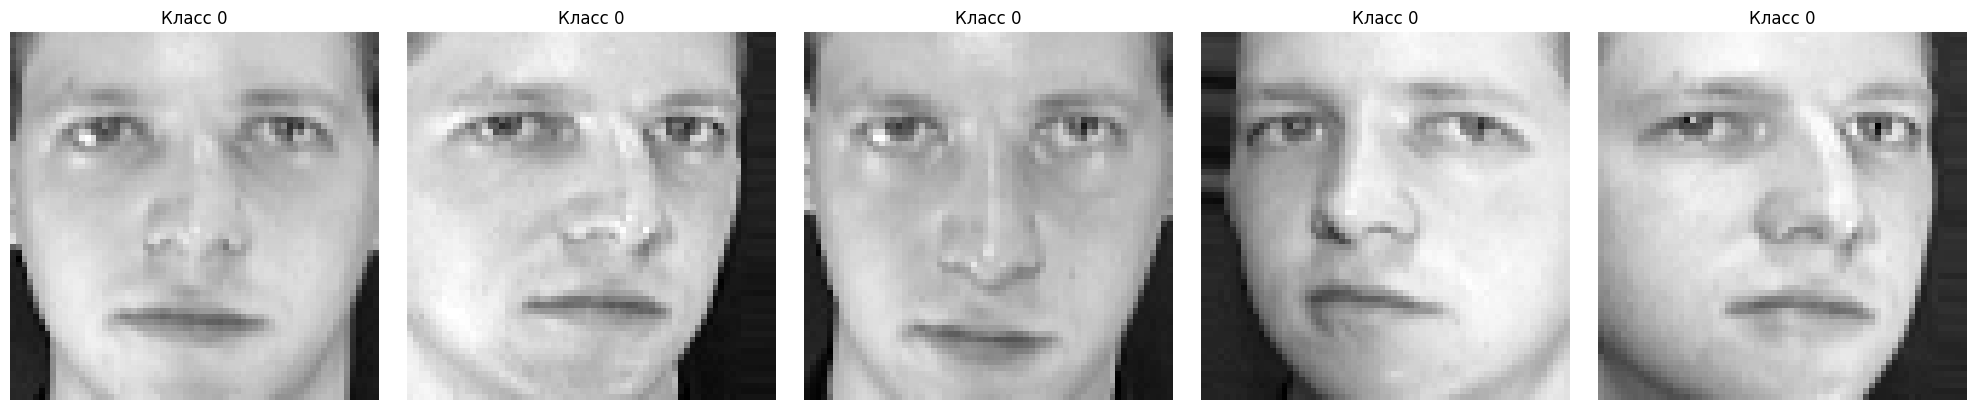

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Разделение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
X = images
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Выпронение переработки изображений

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Создание и обучение моделей градиентного бустинга

CatBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score
import time

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

start_time = time.time()

catboost_model = CatBoostClassifier(
    iterations=50,
    learning_rate=0.1,
    depth=5,
    verbose=0
)
catboost_model.fit(X_train, y_train)

train_time_catboost = time.time() - start_time

y_pred_catboost = catboost_model.predict(X_test)

In [ ]:
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'Точность CatBoost: {accuracy_catboost:.4f}')
print(f'Время обучения CatBoost: {train_time_catboost:.4f}')

Точность CatBoost: 0.8000
Время обучения CatBoost: 333.7859


LGBMClassifire

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

start_time = time.time()

lgb_model = LGBMClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5
)
lgb_model.fit(X_train, y_train)

train_time_lgb = time.time() - start_time

y_pred_lgb = lgb_model.predict(X_test)

In [ ]:
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'Точность LightGBM: {accuracy_lgb:.4f}')
print(f'Время обучения LGBMClassifire: {train_time_lgb:.4f}')

Точность LightGBM: 0.7750
Время обучения LGBMClassifire: 101.0026


XGBClassifier

In [ ]:
from xgboost import XGBClassifier

start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

train_time_xgb = time.time() - start_time

y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Точность XGBoost: {accuracy_xgb:.4f}')
print(f'Время обучения XGBClassifier: {train_time_xgb:.4f}')

Точность XGBoost: 0.7375
Время обучения XGBClassifier: 123.3116


GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5
)
gb_model.fit(X_train, y_train)

train_time_gb = time.time() - start_time

y_pred_gb = gb_model.predict(X_test)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Точность GradientBoosting: {accuracy_gb:.4f}')
print(f'Время обучения GradientBoostingClassifier: {train_time_gb:.4f}')

Точность GradientBoosting: 0.5875
Время обучения GradientBoostingClassifier: 1255.9180


Отчет классификации для CatBoost:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

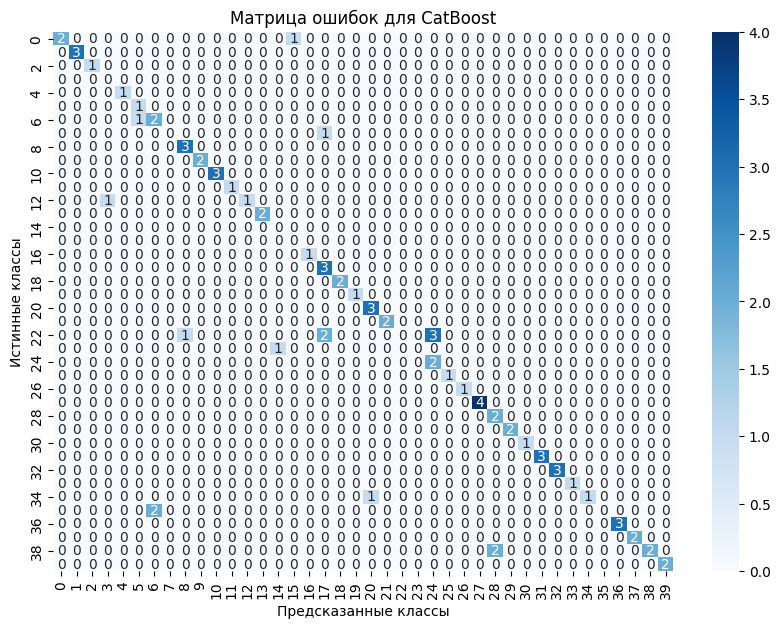

Отчет классификации для LightGBM:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         2
          10       1.00      0.67      0.80         3
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          16       0.33      1.00      0.50         1
          17       0.75      1.00      0.86    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

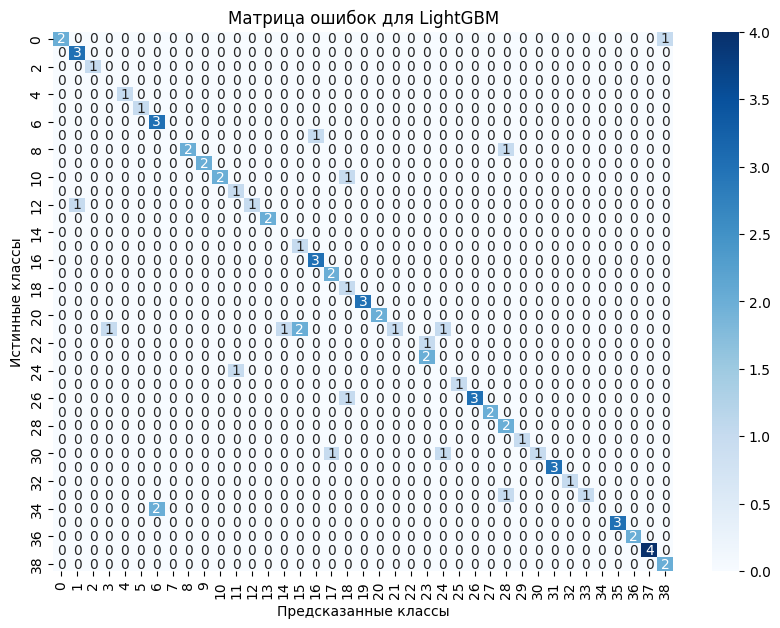

Отчет классификации для XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      0.67      0.67         3
           7       0.00      0.00      0.00         1
           8       1.00      0.33      0.50         3
           9       0.67      1.00      0.80         2
          10       1.00      0.67      0.80         3
          11       0.50      1.00      0.67         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       0.33      1.00      0.50         1
          17       0.50      0.67      0.57         3
          18       1.00      1.00      1.00         2
          19       0.33      1.00      0.50     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


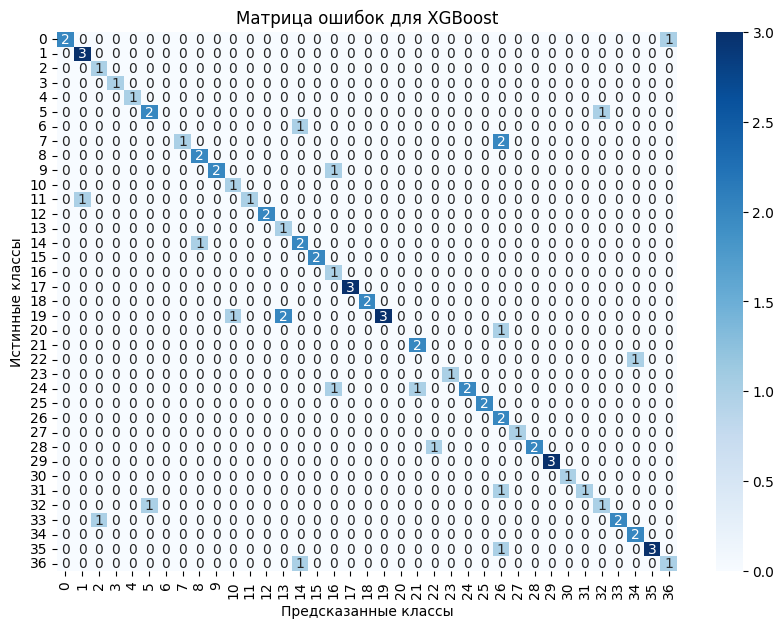

Отчет классификации для GradientBoosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         2
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         1
          12       0.50      0.50      0.50         2
          13       0.50      1.00      0.67         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

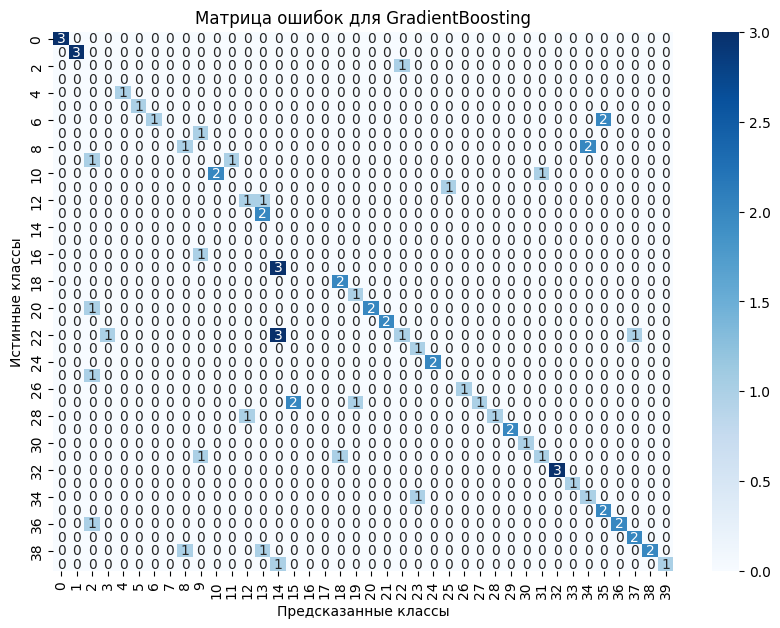

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для вывода отчета классификации и матрицы ошибок
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f'Отчет классификации для {model_name}:')
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.show()

evaluate_model(catboost_model, X_test, y_test, 'CatBoost')
evaluate_model(lgb_model, X_test, y_test, 'LightGBM')
evaluate_model(xgb_model, X_test, y_test, 'XGBoost')
evaluate_model(gb_model, X_test, y_test, 'GradientBoosting')

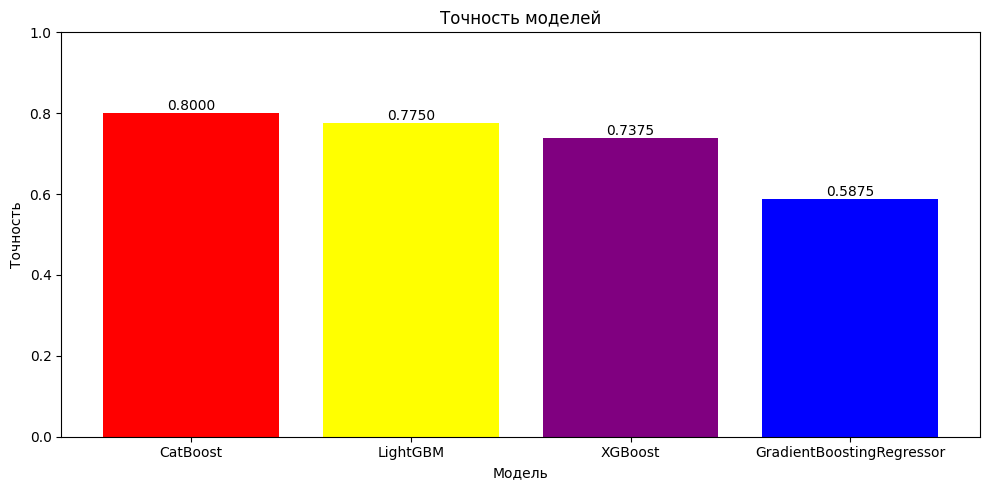

In [ ]:
import matplotlib.pyplot as plt

models = ['CatBoost', 'LightGBM', 'XGBoost', 'GradientBoostingRegressor']
accuracies = [accuracy_catboost, accuracy_lgb, accuracy_xgb, accuracy_gb]
training_times = [train_time_catboost, train_time_lgb, train_time_xgb, train_time_gb]
colors = ['red', 'yellow', 'purple', 'blue']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracies[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

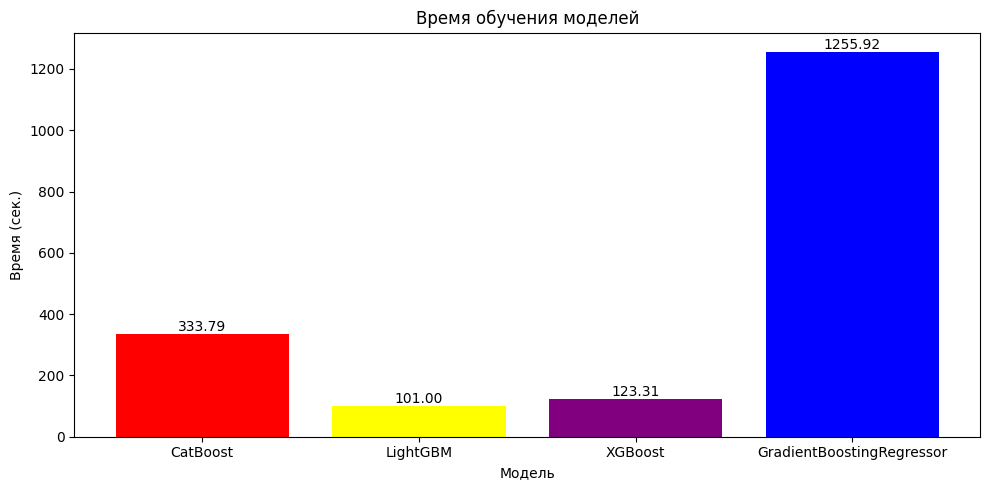

In [ ]:
# Построение графика времени обучения моделей
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (сек.)')
plt.tight_layout()
plt.show()

## **Задание №2: Предсказание нижней половины лица по верхней с помощью алгоритмов градиентного бустинга**




- В этом задании мы применим алгоритмы градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoostingRegressor - для решения интересной задачи регрессии на датасете лиц Olivetti Faces. Цель - предсказать значения пикселей нижней половины лица по пикселям верхней половины.

- Каждое изображение лица представляет собой матрицу 64x64 в оттенках серого. Мы разделим изображения на верхнюю и нижнюю половины и будем предсказывать значения яркости пикселей нижней половины по значениям верхней.

- Сравним качество (по метрике R^2) и время обучения разных реализаций градиентного бустинга на этой задаче восстановления изображений. Посмотрим, насколько хорошо алгоритмы бустинга смогут достроить нижнюю часть лица по верхней.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

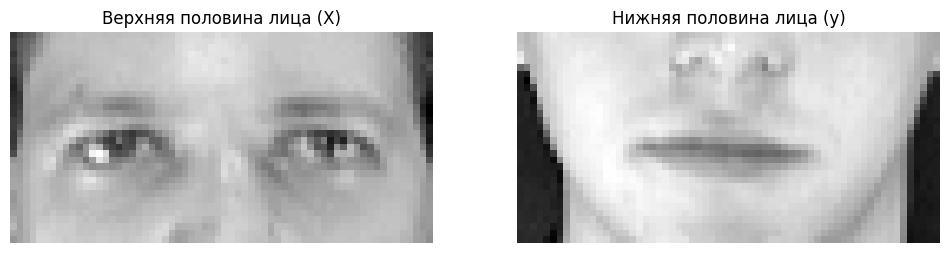

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
n_samples = images.shape[0]

# Разделение изображений на верхнюю и нижнюю половины
upper_half = images[:, :32, :]  # Верхняя половина (первые 32 строки)
lower_half = images[:, 32:, :]  # Нижняя половина (последние 32 строки)

# Преобразование 2D изображений в 1D векторы
X = upper_half.reshape((n_samples, -1))
y = lower_half.reshape((n_samples, -1))

# Выбор одного примера для отображения
sample_index = 0  # Измените значение для выбора другого изображения

# Восстановление изображений из векторов
upper_face = X[sample_index].reshape(32, 64)
lower_face = y[sample_index].reshape(32, 64)

# Отображение верхней и нижней половин лица
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(upper_face, cmap='gray')
axes[0].set_title('Верхняя половина лица (X)')
axes[0].axis('off')

axes[1].imshow(lower_face, cmap='gray')
axes[1].set_title('Нижняя половина лица (y)')
axes[1].axis('off')

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

Разделение данных на обучающую и тестовые выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Используем подвыборку данных для ускорения
sample = 0.3
sample_size = int(len(X_train) * sample)
sample_random = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train_sample = X_train[sample_random]
y_train_sample = y_train[sample_random]

CatBoostRegressor

In [ ]:
start_time = time.time()

model_cbr = MultiOutputRegressor(CatBoostRegressor(iterations=30,
                                                  learning_rate=0.1,
                                                  depth=3,
                                                  thread_count=-1,
                                                  verbose=0))
model_cbr.fit(X_train_sample, y_train_sample)

train_time_cbr = time.time() - start_time

y_pred_cbr = model_cbr.predict(X_test)

r2_cbr = r2_score(y_test, y_pred_cbr)

In [ ]:
print("R^2:", r2_cbr)
print("Training time:", train_time_cbr)

R^2: 0.37363549370962823
Training time: 2776.749454975128


LightGBM

In [ ]:
start_time = time.time()

model_lgbm = MultiOutputRegressor(LGBMRegressor(n_estimators=50,
                                                max_depth=5,
                                                learning_rate=0.1,
                                                num_leaves=30,
                                                verbose=-1))
model_lgbm.fit(X_train_sample, y_train_sample)

train_time_lgbm = time.time() - start_time

y_pred_lgbm = model_lgbm.predict(X_test)

r2_lgbm = r2_score(y_test, y_pred_lgbm)

In [ ]:
print("R^2:", r2_lgbm)
print("Training time:", train_time_lgbm)

R^2: 0.38803740301585976
Training time: 734.4476444721222


XGBoost

In [ ]:
start_time = time.time()

model_xgb = MultiOutputRegressor(XGBRegressor(n_estimators=25,
                                              learning_rate=0.1,
                                              max_depth=3,
                                              tree_method='hist',
                                              n_jobs=-1))

model_xgb.fit(X_train_sample, y_train_sample)

train_time_xgb = time.time() - start_time

y_pred_xgb = model_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
print("R^2:", r2_xgb)
print("Training time:", train_time_xgb)

R^2: 0.37364161014556885
Training time: 1687.0005927085876


GradientBoostingRegressor

In [ ]:
start_time = time.time()

model_gdr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=30,
                                                           learning_rate=0.1,
                                                           max_depth=5))
model_gdr.fit(X_train_sample, y_train_sample)

train_time_gdr = time.time() - start_time

y_pred_gdr  = model_gdr.predict(X_test)

r2_gdr = r2_score(y_test, y_pred_gdr)

In [ ]:
print("R^2:", r2_gdr)
print("Training time:", train_time_gdr)

R^2: 0.26684687682156005
Training time: 6300.146973133087


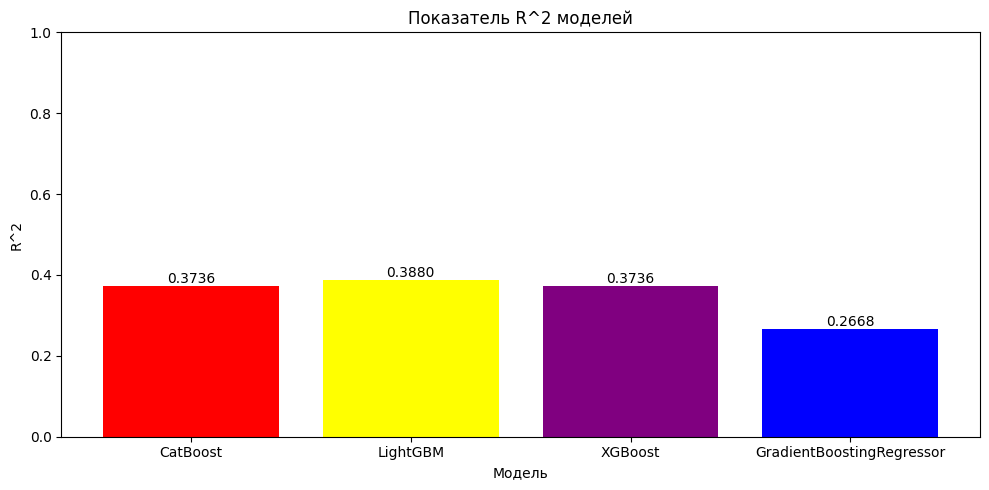

In [ ]:
models = ['CatBoost', 'LightGBM', 'XGBoost', 'GradientBoostingRegressor']
r2_scores = [r2_cbr, r2_lgbm, r2_xgb, r2_gdr]
training_times = [train_time_cbr, train_time_lgbm, train_time_xgb, train_time_gdr]
colors = ['red', 'yellow', 'purple', 'blue']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2_scores[i]:.4f}', ha='center', va='bottom')
plt.title('Показатель R^2 моделей')
plt.xlabel('Модель')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

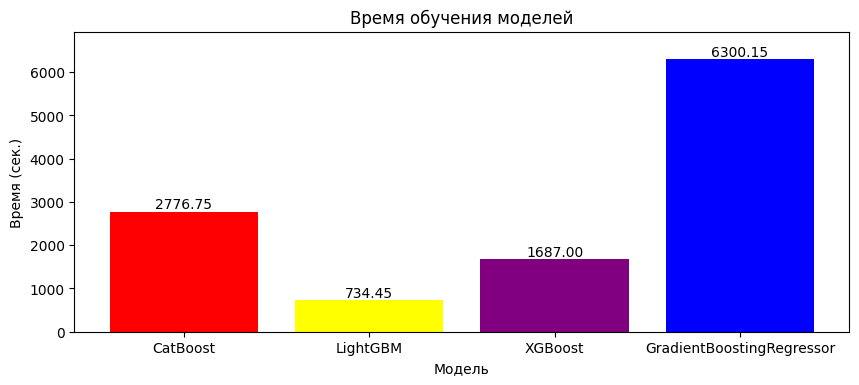

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (cек.)')
plt.ylim(0, max(training_times) * 1.1)
plt.subplots_adjust(bottom=0.2, top=0.8)
plt.show()

## **Задание №3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier**



- В этом задании мы применим ансамблевый метод классификации VotingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. VotingClassifier объединяет предсказания нескольких базовых классификаторов путем голосования, что позволяет улучшить качество классификации по сравнению с отдельными моделями

- Мы будем использовать несколько "слабых" классификаторов, таких как LogisticRegression, DecisionTreeClassifier и KNeighborsClassifier, NaiveBayes и объединим их в ансамбль с помощью VotingClassifier. Затем сравним точность ансамбля с отдельными базовыми моделями и оценим эффект от их комбинирования.



- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

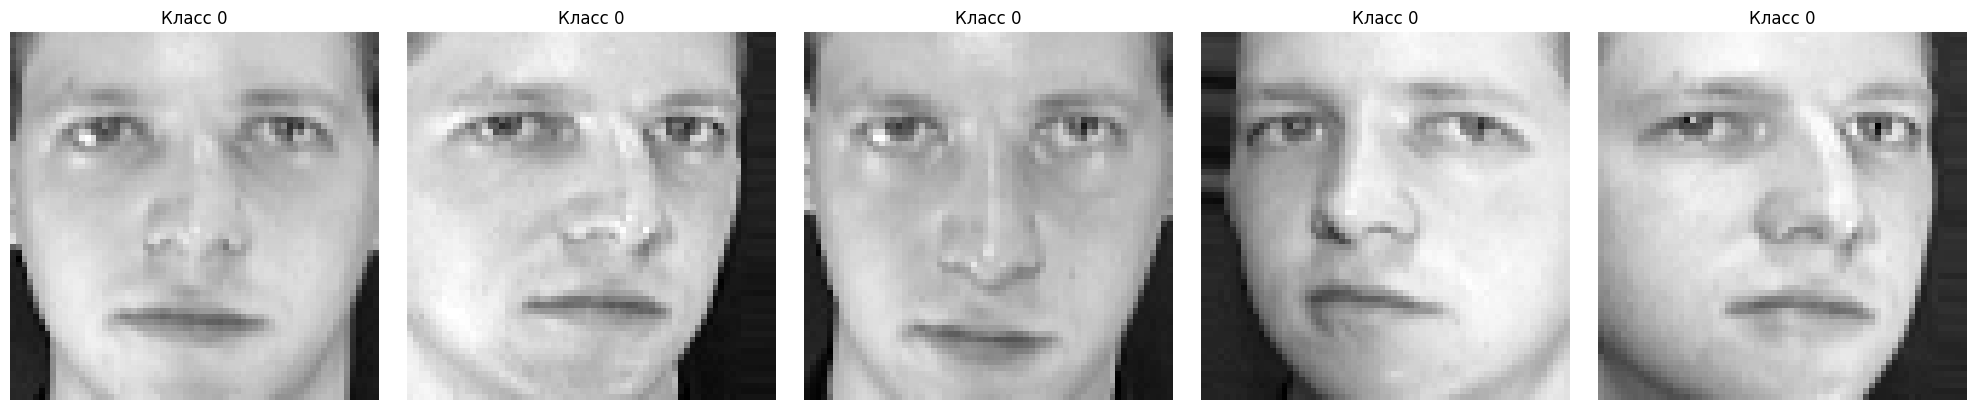

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Разделение данных на обучающую и тестовую выборки

In [ ]:
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
# Стандартизация признаков для моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Определение базовых моделей
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [ ]:
voting = VotingClassifier(
    estimators=[('log_reg', log_reg), ('dt', dt), ('knn', knn), ('nb', nb)],
    voting='soft'
)

models = {
    'Логистическая регрессия': log_reg,
    'Дерево решений': dt,
    'KNN': knn,
    'Наивный Байес': nb,
    'Ансамбль (Voting)': voting
}

In [ ]:
# Обучение моделей
for name, model in models.items():
    if name == 'Ансамбль (Voting)':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

In [ ]:
accuracies = {}
for name, model in models.items():
    if name == 'Логистическая регрессия':
      y_pred_log_reg = log_reg.predict(X_test_scaled)
      accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
      accuracies[name] = accuracy_log_reg
    elif name == 'Ансамбль (Voting)':
      y_pred = model.predict(X_test_scaled)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy
    else:
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy

print("\nТочность моделей:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


Точность моделей:
Логистическая регрессия: 0.4500
Дерево решений: 0.5375
KNN: 0.8125
Наивный Байес: 0.8625
Ансамбль (Voting): 0.9250


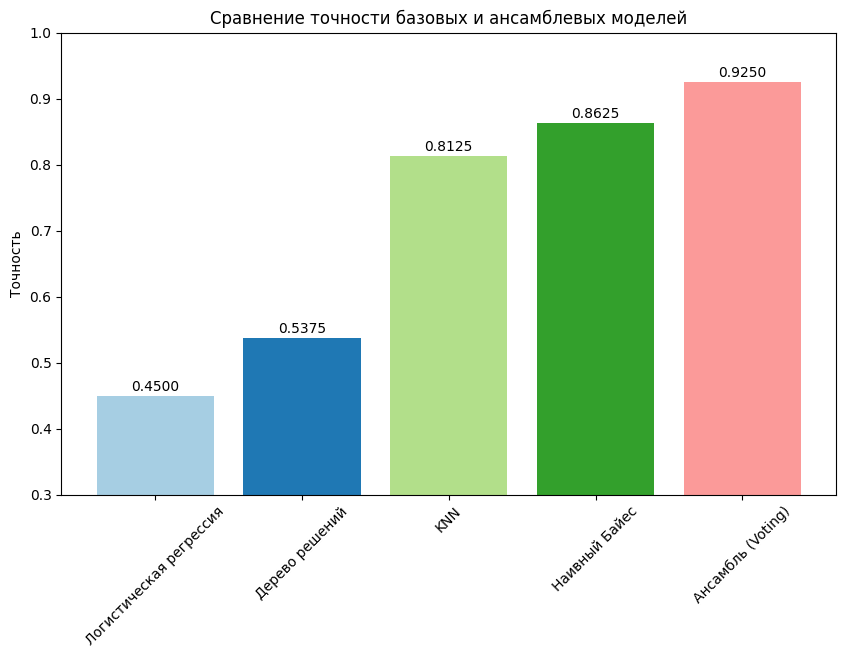

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=plt.cm.Paired(range(len(accuracies))))
plt.title('Сравнение точности базовых и ансамблевых моделей')
plt.ylabel('Точность')
plt.ylim([0.3, 1.0])

for bar, accuracy in zip(bars, accuracies.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.003, f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Ансамбль (Voting)')

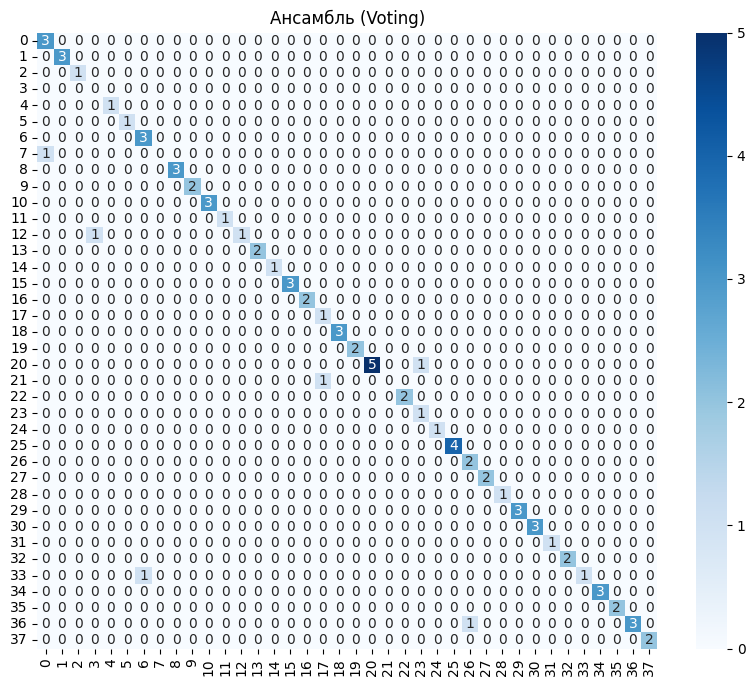

In [ ]:
y_pred = model.predict(X_test_scaled)
conf_mat_voting=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_voting,annot=True,fmt='d',cmap='Blues')
plt.title('Ансамбль (Voting)')

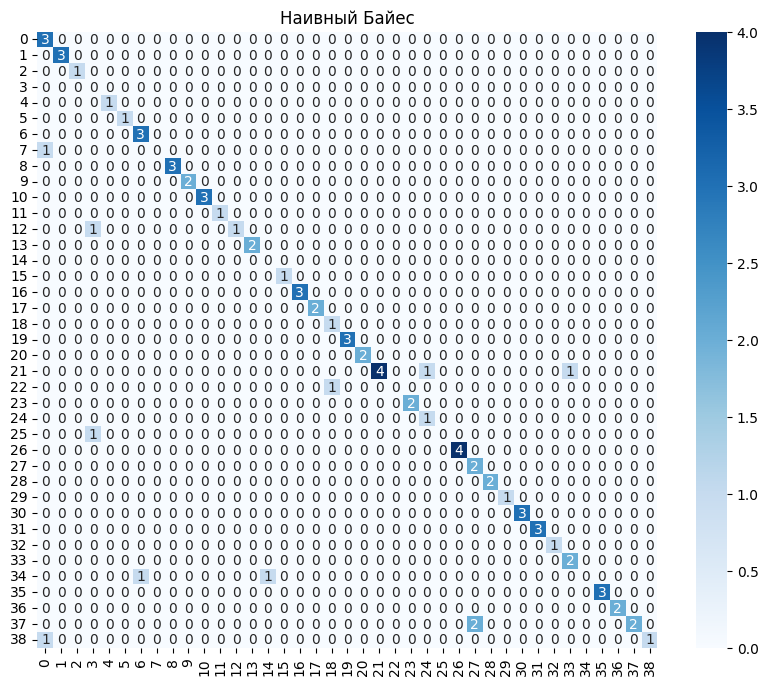

In [ ]:
for name, model in models.items():
    if name == 'Наивный Байес':
        y_pred_nb = model.predict(X_test)
        conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_nb, annot=True, fmt='d',cmap='Blues')
        plt.title('Наивный Байес')
        plt.show()

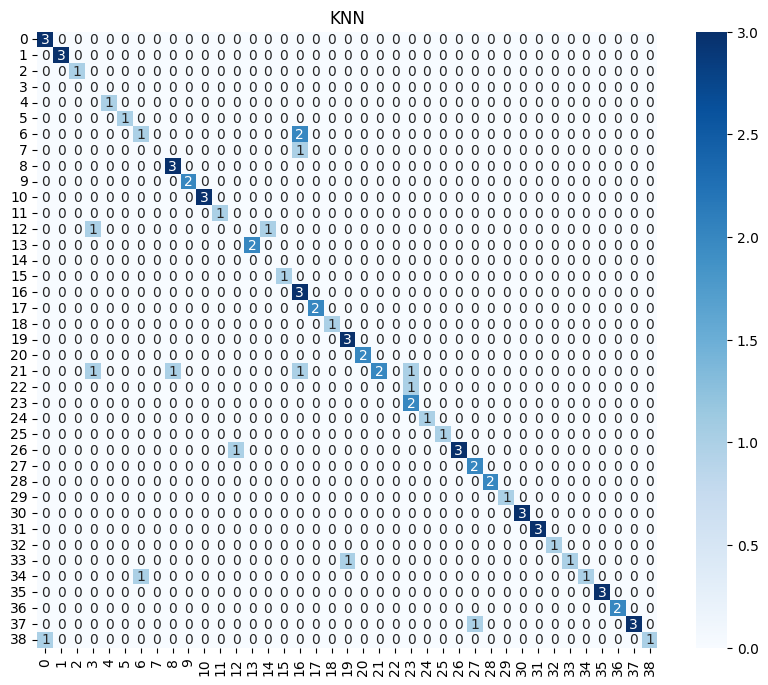

In [ ]:
for name, model in models.items():
    if name == 'KNN':
        y_pred_knn = model.predict(X_test)
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_knn, annot=True, fmt='d',cmap='Blues')
        plt.title('KNN')
        plt.show()

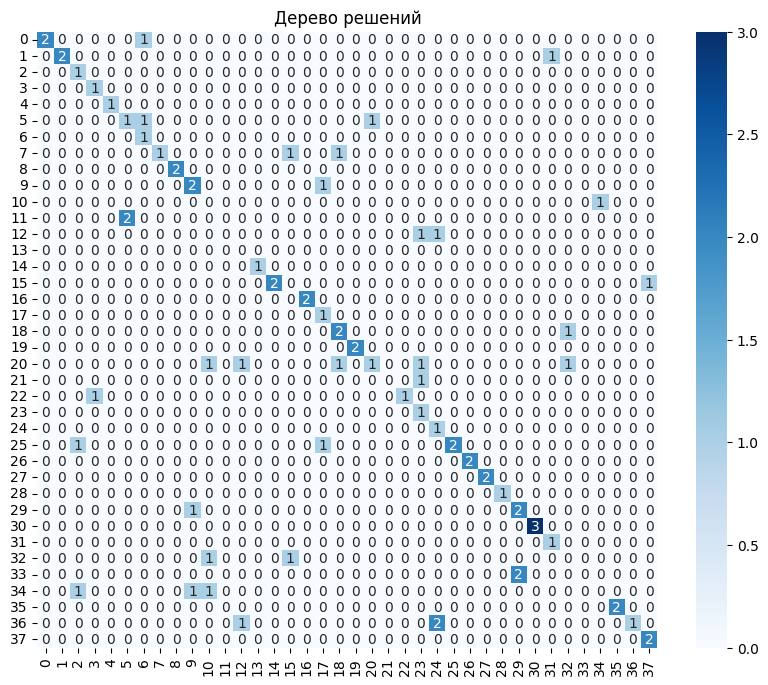

In [ ]:
for name, model in models.items():
    if name == 'Дерево решений':
        y_pred_dt = model.predict(X_test)
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_dt, annot=True, fmt='d',cmap='Blues')
        plt.title('Дерево решений')
        plt.show()

Text(0.5, 1.0, 'Логистическая регрессия')

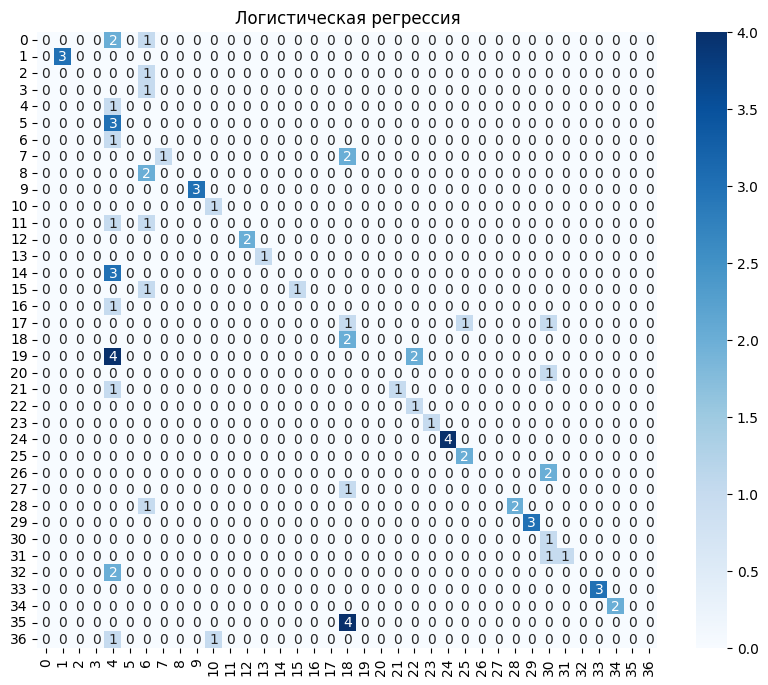

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
conf_mat_log_reg=confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_log_reg,annot=True,fmt='d',cmap='Blues')
plt.title('Логистическая регрессия')

## **Задание №4: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов** [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)



- В этом задании мы применим ансамблевый метод классификации StackingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. StackingClassifier объединяет предсказания нескольких базовых классификаторов путем обучения метаклассификатора на их выходах, что позволяет улучшить качество классификации по сравнению с отдельными моделями и методом голосования VotingClassifier.


- Мы будем использовать несколько "слабых" классификаторов первого уровня, таких как LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и GaussianNB. Затем мы обучим метаклассификатор второго уровня (например, LogisticRegression или SVC) на выходах классификаторов первого уровня. Метаклассификатор будет учиться комбинировать предсказания базовых моделей оптимальным образом.




- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

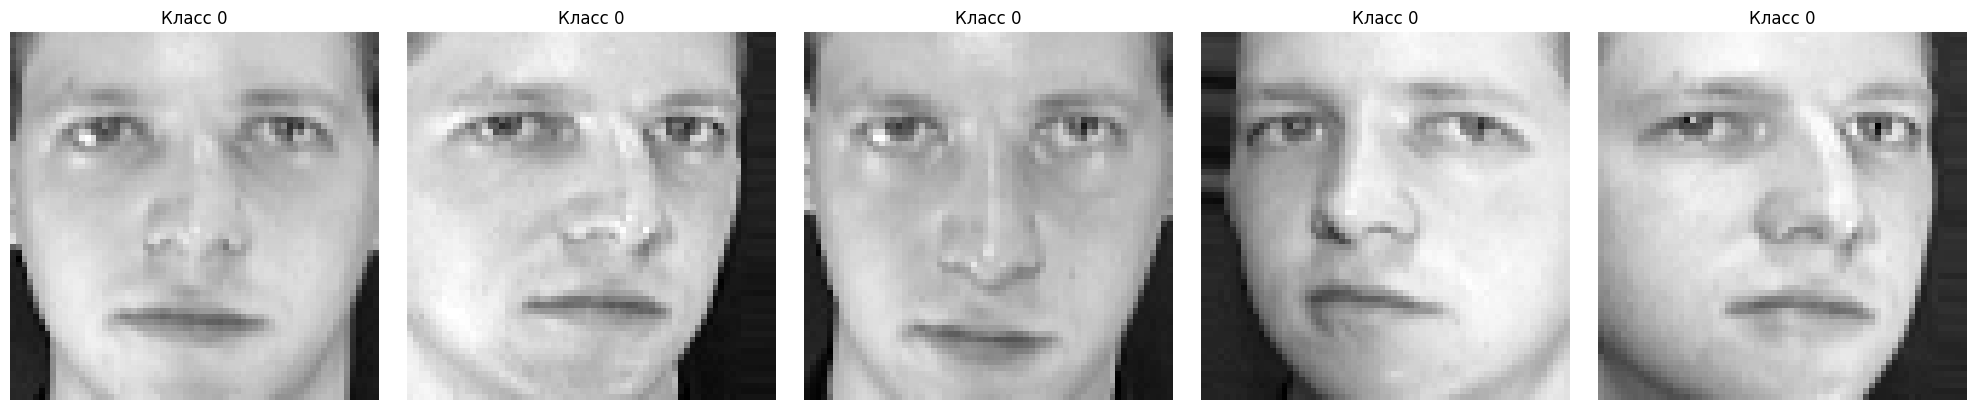

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Разделение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Стандартизация признаков для моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
base_models = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB())
]

# Мета-модель
meta_model = LogisticRegression()

# Создание регрессора стекинга
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    #cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

In [ ]:
# Обучение классификатора стекинга
stacking_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('log_reg', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
stacking_pred = stacking_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, stacking_pred)
print(f"Точность StackingClassifier: {accuracy:.4f}")

Точность StackingClassifier: 0.9125


In [ ]:
for name, model in base_models:
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность ({name}): {accuracy:.4f}")

Точность (log_reg): 0.9500
Точность (dt): 0.5250
Точность (knn): 0.7875
Точность (gnb): 0.8625


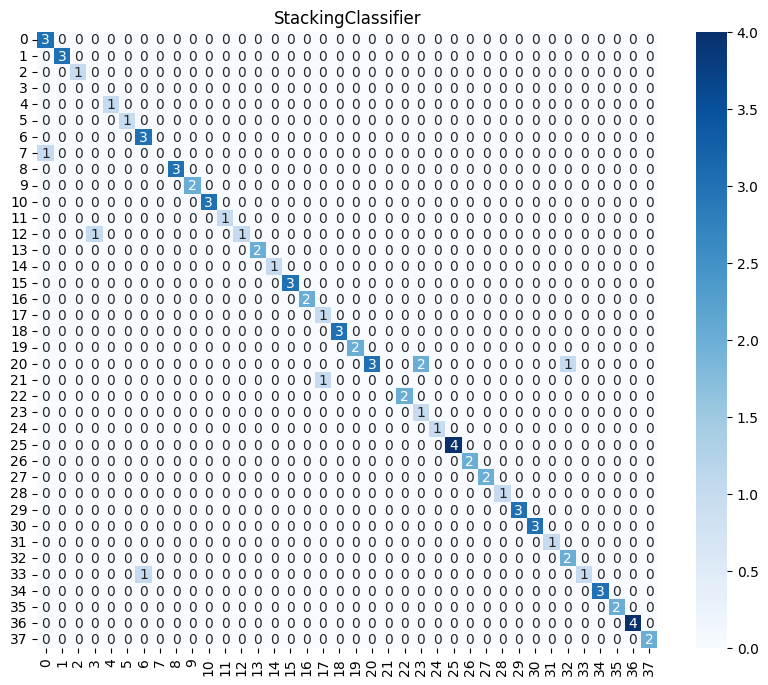

In [ ]:
conf_mat=confusion_matrix(y_test, stacking_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.title('StackingClassifier')
plt.show()

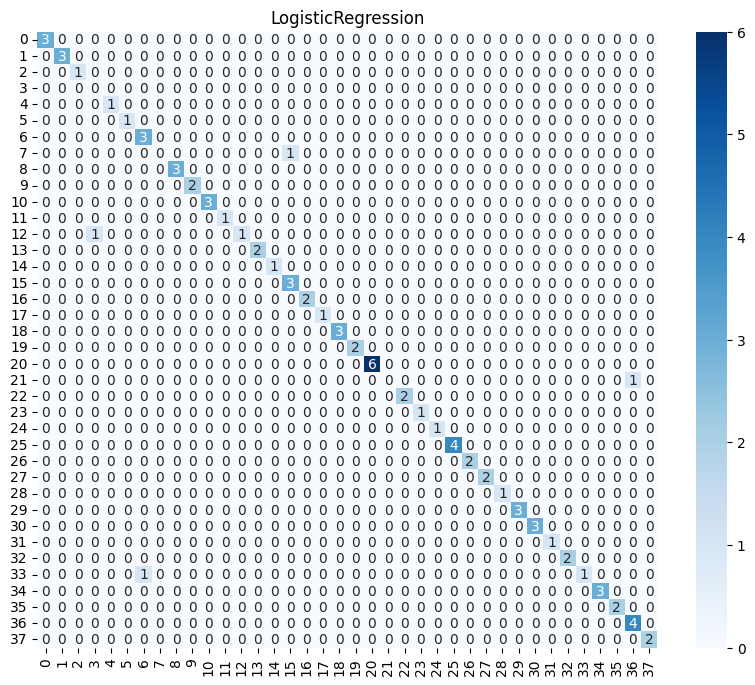

In [ ]:
for name, model in base_models:
    if name == 'log_reg':
        model.fit(X_train_scaled, y_train)
        y_pred_log_reg = model.predict(X_test_scaled)
        conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_log_reg,annot=True,fmt='d',cmap='Blues')
        plt.title('LogisticRegression')
        plt.show()

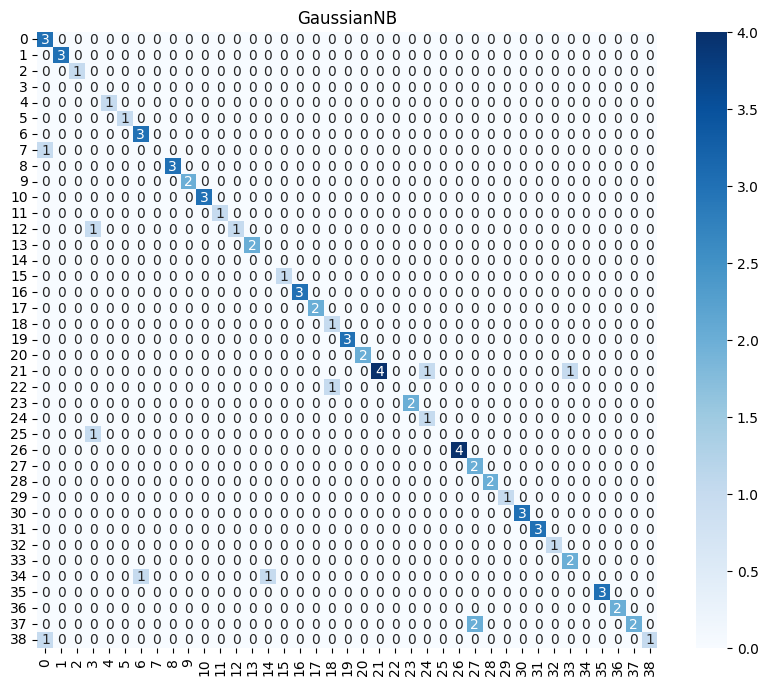

In [ ]:
for name, model in base_models:
    if name == 'gnb':
        model.fit(X_train_scaled, y_train)
        y_pred_gnb = model.predict(X_test_scaled)
        conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_gnb,annot=True,fmt='d',cmap='Blues')
        plt.title('GaussianNB')
        plt.show()

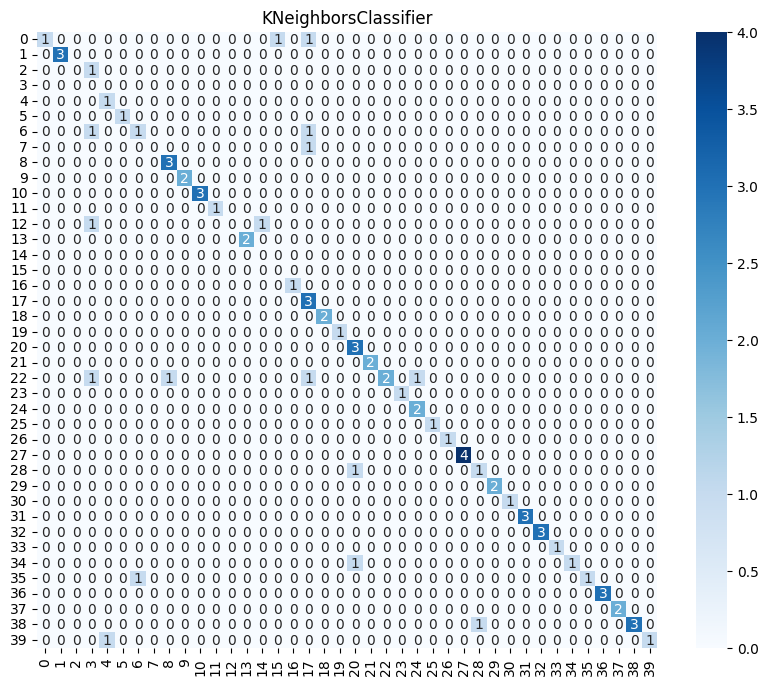

In [ ]:
for name, model in base_models:
    if name == 'knn':
        model.fit(X_train_scaled, y_train)
        y_pred_knn = model.predict(X_test_scaled)
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_knn,annot=True,fmt='d',cmap='Blues')
        plt.title('KNeighborsClassifier')
        plt.show()

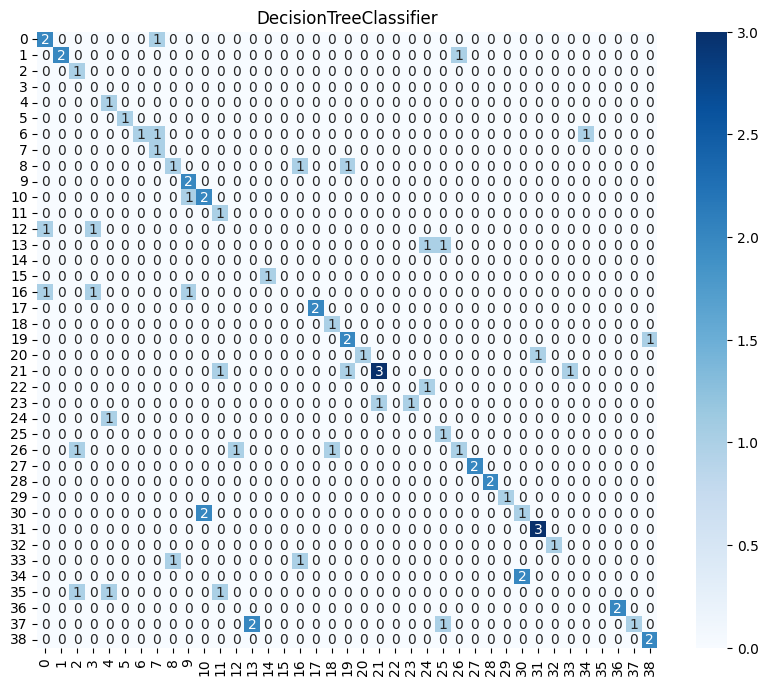

In [ ]:
for name, model in base_models:
    if name == 'dt':
        model.fit(X_train_scaled, y_train)
        y_pred_dt = model.predict(X_test_scaled)
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_dt,annot=True,fmt='d',cmap='Blues')
        plt.title('DecisionTreeClassifier')
        plt.show()